In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("/content/drive/MyDrive/fake_reg.csv")

In [5]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

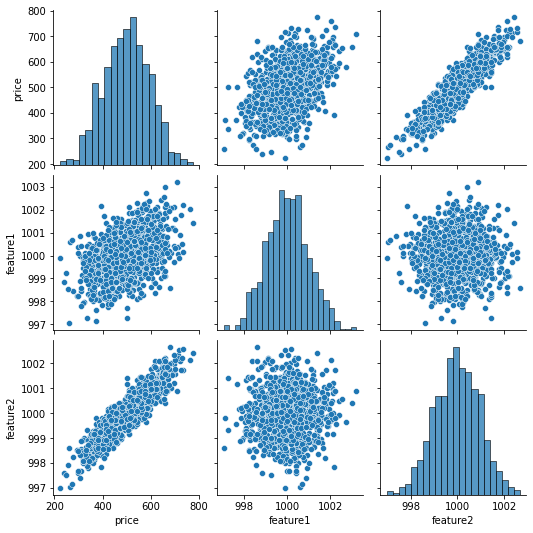

In [9]:
sns.pairplot(df)

In [10]:
from sklearn.model_selection import train_test_split

# **Train-Test Splitting**

In [12]:
 X = df[['feature1','feature2']].values
 Y = df['price'].values

 X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=10)


# **Cheackin for dimension**

In [17]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(X_test.shape)

(750, 2)
(250, 2)
(750,)
(250, 2)


In [18]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler

In [22]:
scaler.fit(X_train)

MinMaxScaler()

In [23]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation

In [34]:
model = Sequential([
  Dense(units=2),
  Dense(units=2),
  Dense(units=2) 
])

In [33]:
model = Sequential()
model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(2))

In [38]:
model = Sequential()
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1)) #output layer

model.compile(optimizer='rmsprop',loss='mse')

# **Choosing an Optimizer and loss func**
Depend upon the prob wheter it is binary/classification/regression

# **Training the model**

In [80]:
model.fit(X_train,Y_train,epochs=60)

Epoch 1/60
24/24 [==============================] - 0s 2ms/step - loss: 24.6318
Epoch 2/60
24/24 [==============================] - 0s 2ms/step - loss: 24.8062
Epoch 3/60
24/24 [==============================] - 0s 2ms/step - loss: 24.8373
Epoch 4/60
24/24 [==============================] - 0s 2ms/step - loss: 25.0353
Epoch 5/60
24/24 [==============================] - 0s 2ms/step - loss: 24.8673
Epoch 6/60
24/24 [==============================] - 0s 2ms/step - loss: 25.1706
Epoch 7/60
24/24 [==============================] - 0s 2ms/step - loss: 24.6903
Epoch 8/60
24/24 [==============================] - 0s 2ms/step - loss: 24.8683
Epoch 9/60
24/24 [==============================] - 0s 2ms/step - loss: 24.7054
Epoch 10/60
24/24 [==============================] - 0s 3ms/step - loss: 24.8124
Epoch 11/60
24/24 [==============================] - 0s 2ms/step - loss: 24.9193
Epoch 12/60
24/24 [==============================] - 0s 2ms/step - loss: 24.9407
Epoch 13/60
24/24 [==================

In [50]:
loss  = model.history.history['loss']

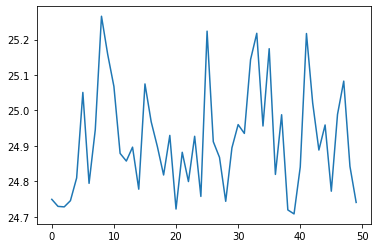

In [51]:
sns.lineplot(x=range(len(loss)),y=loss)

In [54]:
training_score = model.evaluate(X_train,Y_train,verbose=1)
test_score = model.evaluate(X_test,Y_test,verbose=1)

8/8 [==============================] - 0s 2ms/step - loss: 23.3397


In [55]:
training_score

24.537160873413086

In [56]:
test_score

23.339672088623047

# **Matrics Prediction**

In [57]:
test_pred = model.predict(X_test)

8/8 [==============================] - 0s 3ms/step


test_pred

In [62]:
pred_df = pd.DataFrame(Y_test,columns=['Test Y'])

In [63]:
pred_df

,Test Y
0,456.987616
1,560.664092
2,603.887577
3,622.371474
4,352.282587
...,...
245,492.873271
246,533.072108
247,461.490490
248,549.847620


In [65]:
test_predictions = pd.Series(test_pred.reshape(250,))

In [66]:
test_predictions

0      461.611481
1      563.362488
2      605.435120
3      621.031555
4      351.168243
          ...    
245    493.287689
246    530.437988
247    461.350983
248    549.428223
249    443.794189
Length: 250, dtype: float32

In [67]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [68]:
pred_df

,Test Y,0
0,456.987616,461.611481
1,560.664092,563.362488
2,603.887577,605.435120
3,622.371474,621.031555
4,352.282587,351.168243
...,...,...
245,492.873271,493.287689
246,533.072108,530.437988
247,461.490490,461.350983
248,549.847620,549.428223


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [69]:
test_score

23.339672088623047

# **Predictions on brand new data**

In [71]:
new_gem = [[998,1000]]

In [76]:
a =scaler.transform(new_gem)

In [81]:
model.predict(a)

1/1 [==============================] - 0s 22ms/step


array([[419.58267]], dtype=float32)

In [82]:
model.save('my_model.h5')